In [1]:
#importing the neccessary libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#Importing and converting the csv file to a Pandas Dataframe for easy manipulation
df = pd.read_csv('creditcard_2023.csv')


## Information on that the columns represent

- id: Unique identifier for each transaction
- V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- Amount: The transaction amount
- Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [3]:
#Displaying the first five datapoints
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
#Removing the id column because it's redundant with the index
df.drop('id', axis=1, inplace= True)

In [5]:
#Displaying the inofrmation on the dataset, and the summary of its numerical statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [6]:
#Checking for null values in the dataset
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

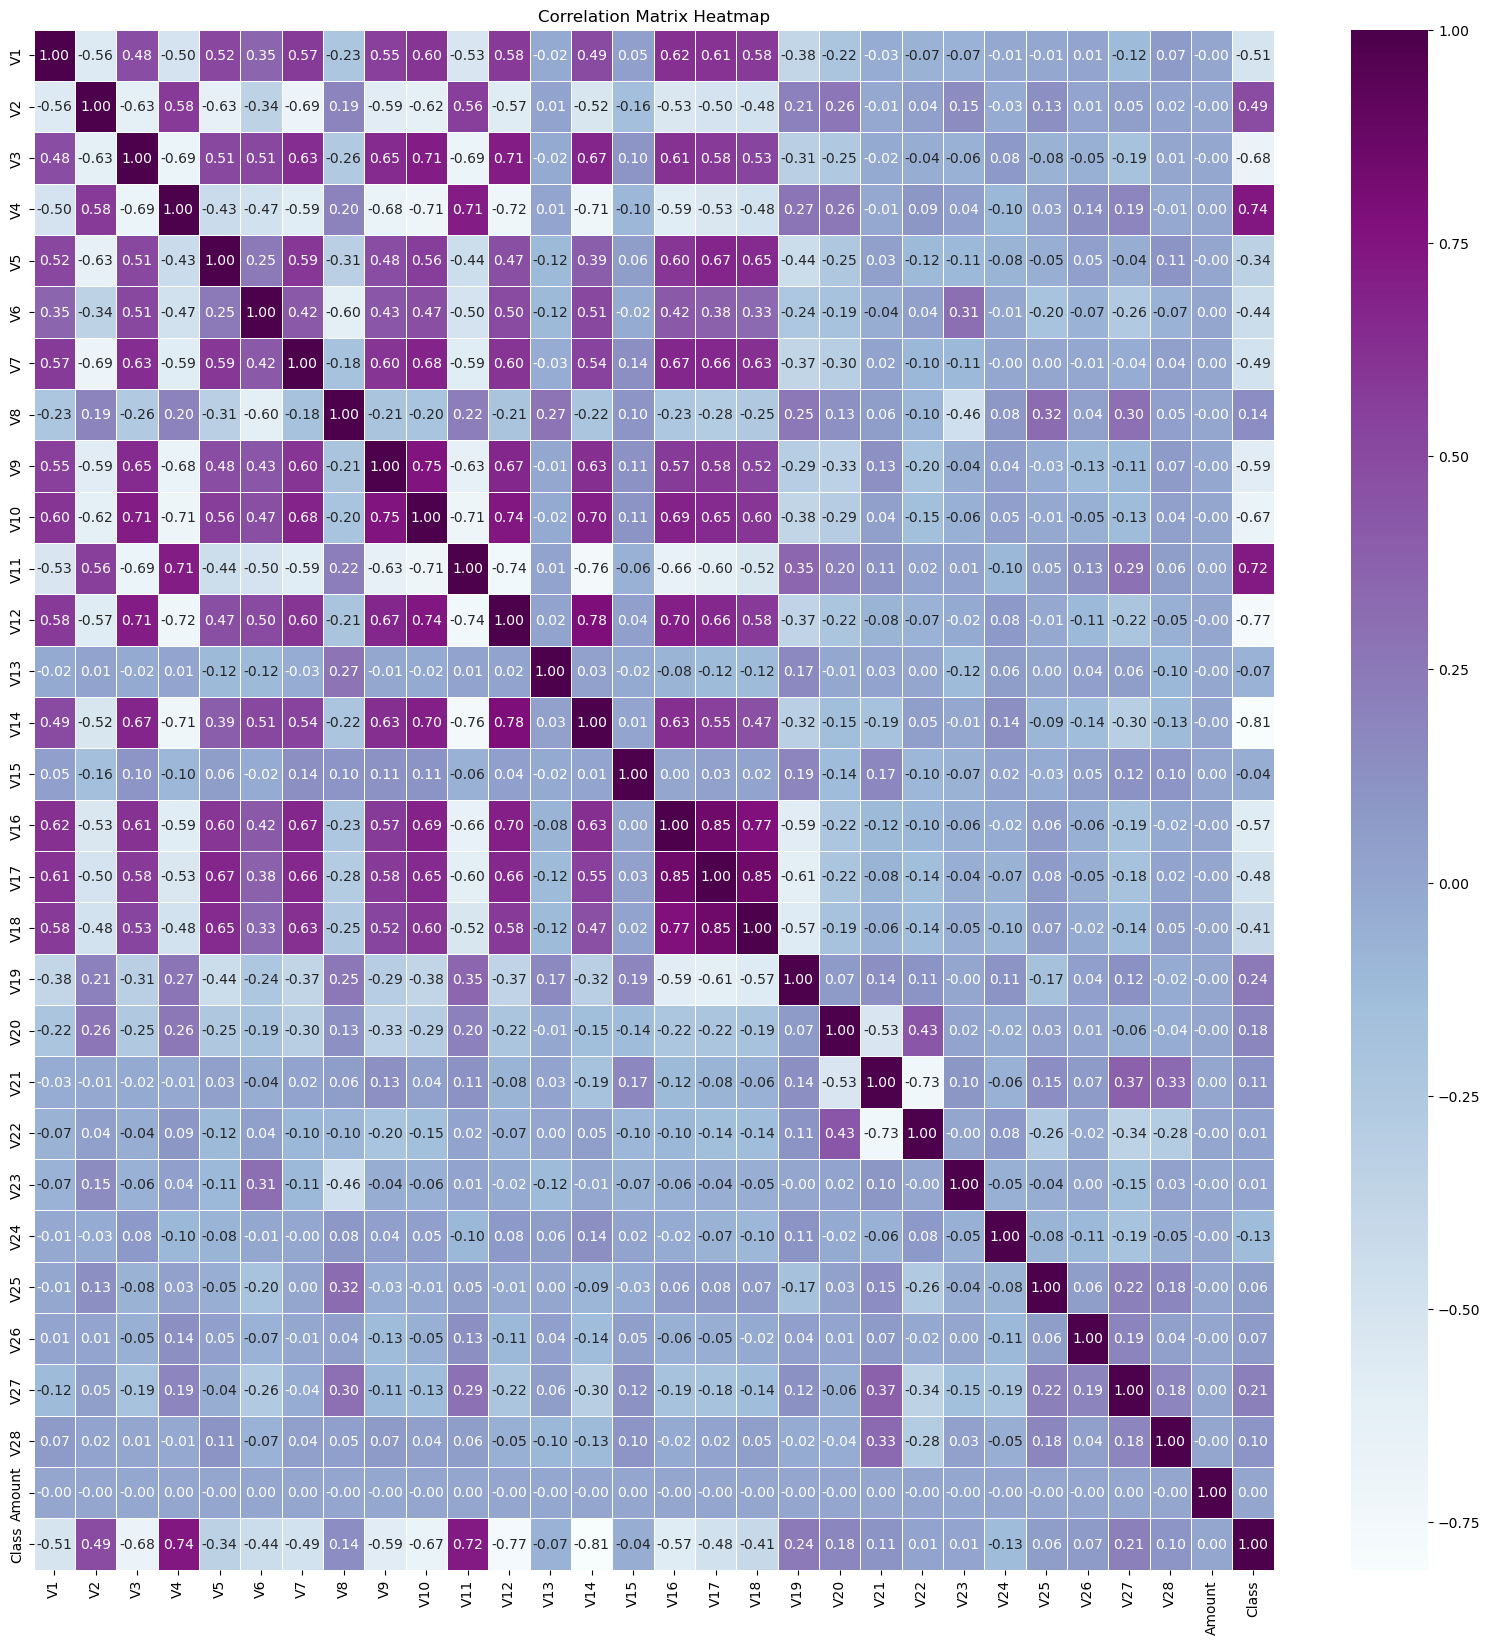

In [7]:
#Checking correlation between all columns
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

<Axes: xlabel='Class', ylabel='count'>

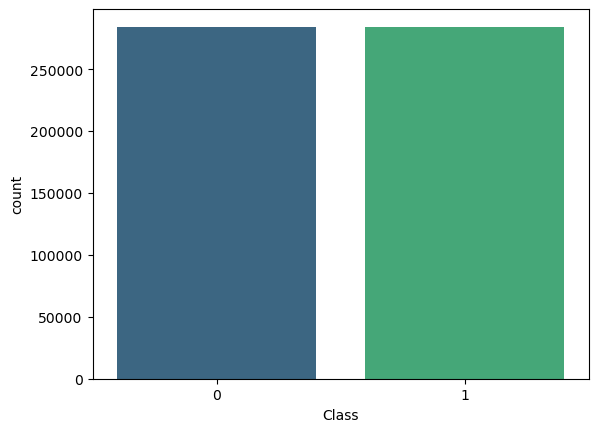

In [8]:
#Displaying the count plot of the Class column to check how balanced the dataset is
sns.countplot(x=df['Class'], palette='viridis')


<Axes: ylabel='Class'>

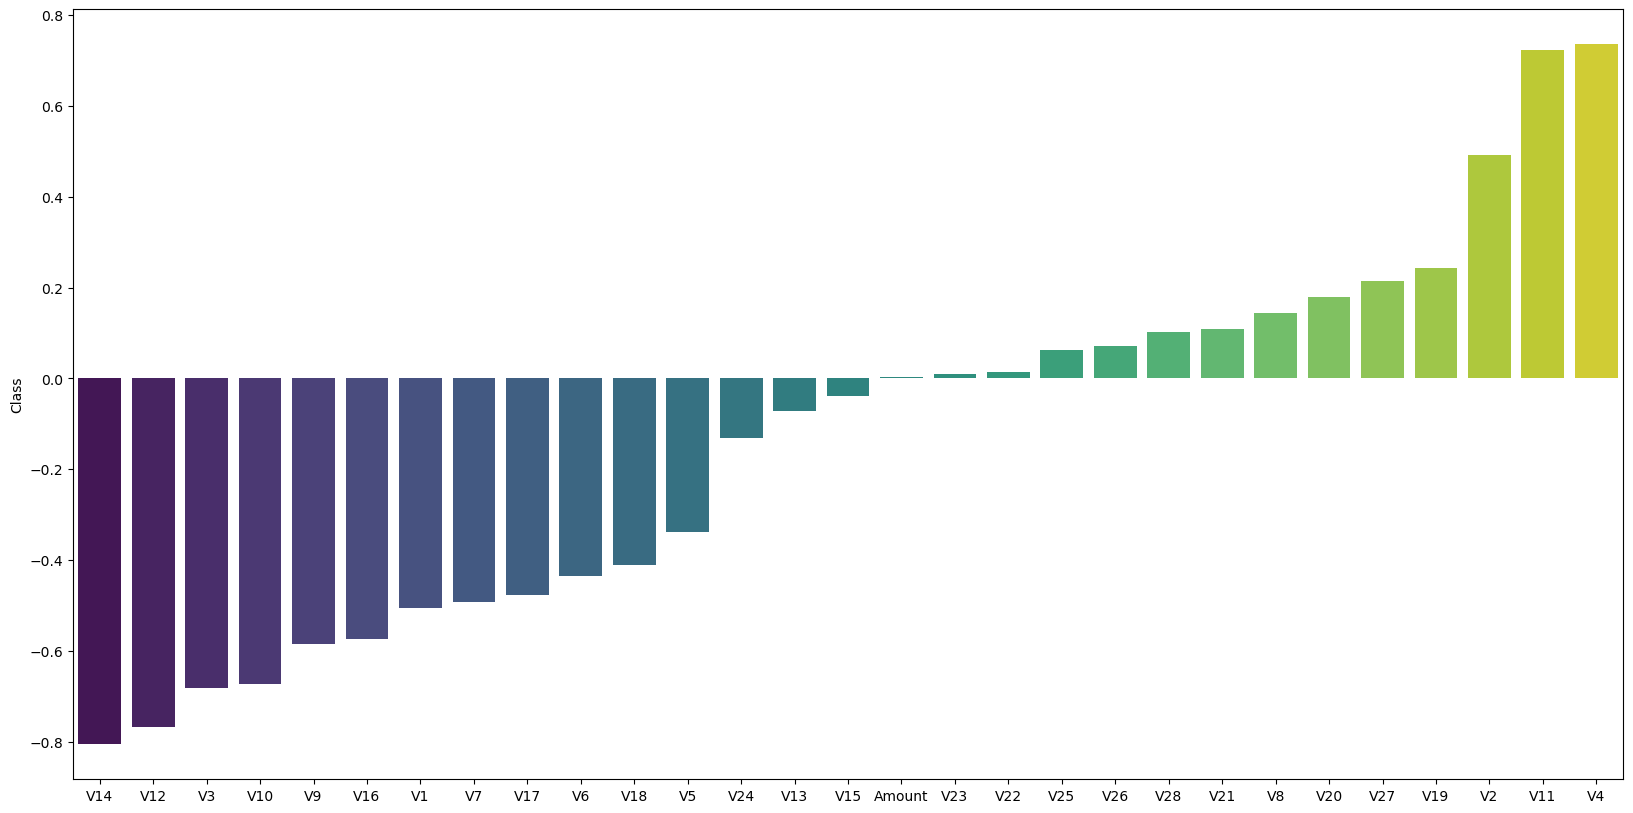

In [9]:
#Plotting the correlation between all columns to the class
corr = pd.DataFrame(df.corr()['Class'].drop('Class')).sort_values(by='Class',ascending= True)
fig = plt.figure(figsize=(20,10))
sns.barplot(corr, x= corr.index, y=corr['Class'], palette='viridis')

In [10]:
#importing scikit-learn to split the data and scale the feature columns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Splitting the dataframe to its features and label and then splitting it to training and test datasets
X = df.drop('Class', axis= 1)
y = df['Class']

In [11]:
#Splittng the feature and label columns whereby Test set is 30% of the dataset and train set is 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
#Scaling the feature columns to have similar scales, scaling the test and train dtataset differently to avoid data leakage
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)


In [13]:
#Importing the models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Model Building
- Logistic Regression
- Decision Tree Regressor
- K Nearest Neighbor
- Support Vector Machine

In [15]:
# Creating all the models obect and fitting the training feature 
# and labels to the models and then predicting with the test feature

# Linear Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)

# Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)
decision_tree_predictions = decision_tree_reg.predict(X_test)

# K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
    

In [52]:
'''
Importing metrics from sklearn to evaluate the predictions
- Created a for loop to iterate throught the predictions of each model and 
then calculating its accuracy and classification report
'''
from sklearn.metrics import classification_report, confusion_matrix
Accuracy = {'Logistic Regression': 0, 'Decision Tree Regressor': 0,
          'K Nearest Neighbor': 0, 'Support Vector Machine': 0}
models = ['Logistic Regression', 'Decision Tree Regressor',
          'K Nearest Neighbor', 'Support Vector Machine']
predictions = [log_reg_predictions, decision_tree_predictions,
              knn_predictions, svc_predictions]
for acc, model, prediction in zip(list(Accuracy.keys()), models, predictions):
    Accuracy[acc] = np.mean(y_test == prediction)
    print(f'{model} - Accuracy: {Accuracy[acc]} \n')
    print(classification_report(y_test, prediction), '\n')
    print('\n'*3)


Logistic Regression - Accuracy: 0.9650329153696897 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85510
           1       0.98      0.95      0.96     85079

    accuracy                           0.97    170589
   macro avg       0.97      0.96      0.97    170589
weighted avg       0.97      0.97      0.97    170589
 





Decision Tree Regressor - Accuracy: 0.9974969077724823 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85510
           1       1.00      1.00      1.00     85079

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589
 





K Nearest Neighbor - Accuracy: 0.9991324176822656 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85510
           1       1.00      1.00      1.00     85079

    accu

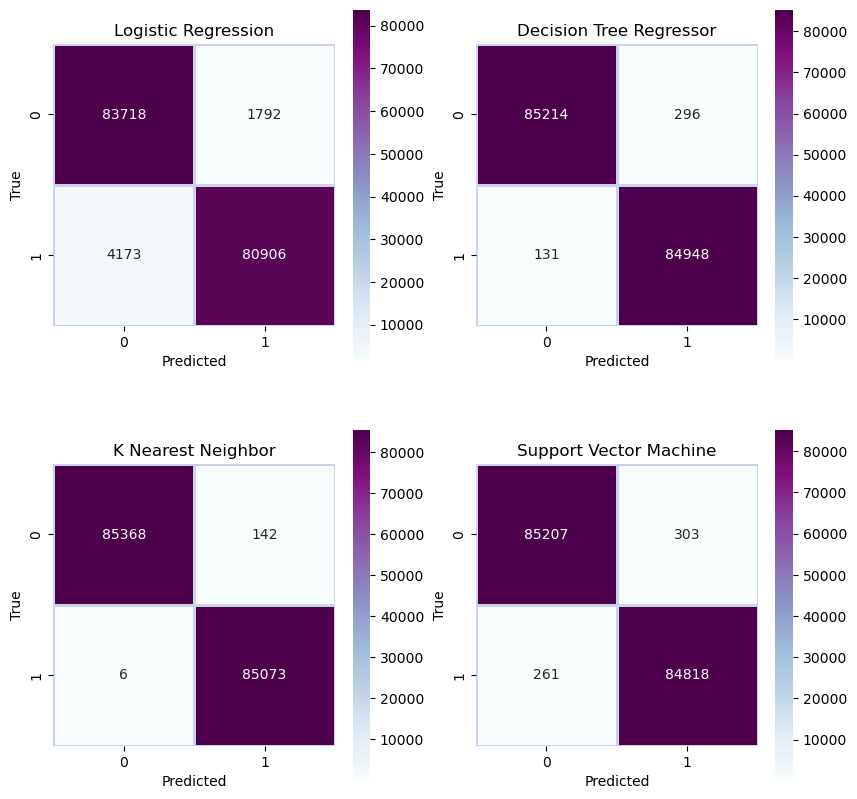

In [53]:
#Displaying the confusion matrix of all the models as a heatmap
fig = plt.figure(figsize=(10,10))
for prediction, e, model in zip(predictions,[1,2,3,4], models):
    plt.subplot(2,2,e)
    sns.heatmap(confusion_matrix(y_test, prediction), annot= True, cmap='BuPu',
                fmt='.0f', square=True, linewidths=2, linecolor="#CCD1ED")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(model)
    
#From the Confusion matrix the best model performance is the Support Vector Machine

,Models,Accuracy
0,Logistic Regression,0.965033
1,Decision Tree Regressor,0.997497
2,K Nearest Neighbor,0.999132
3,Support Vector Machine,0.996694


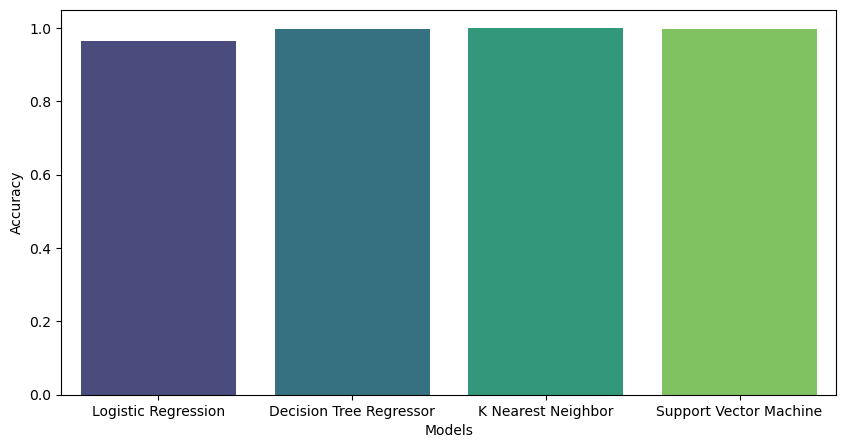

In [64]:
'''
Creating a pandas DataFrame with two columns which the Models will have its respective accuracy on the dataset
Using the Dataframe to plot a bar chart of the accuracies agains their respective models
'''
acc = pd.DataFrame({'Models': list(Accuracy.keys()), 'Accuracy': list(Accuracy.values())})
fig = plt.figure(figsize=(10,5))
sns.barplot(x= acc['Models'], y=acc['Accuracy'], palette='viridis')
acc